In [1]:
import networkx as nx
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Step 1: Load data

In [2]:
%cat edges.csv

Edg1,Edg2
A,B
A,C
B,C
C,D
D,F
C,E
F,E
E,G
G,H
F,G
I,J
J,K
I,K


In [3]:
df=pd.read_csv('edges.csv')
edges=df.to_numpy()

In [4]:
edges

array([['A', 'B'],
       ['A', 'C'],
       ['B', 'C'],
       ['C', 'D'],
       ['D', 'F'],
       ['C', 'E'],
       ['F', 'E'],
       ['E', 'G'],
       ['G', 'H'],
       ['F', 'G'],
       ['I', 'J'],
       ['J', 'K'],
       ['I', 'K']], dtype=object)

In [5]:
G=nx.Graph()
G.add_edges_from(edges)

## Step 2: Visualize the Network 

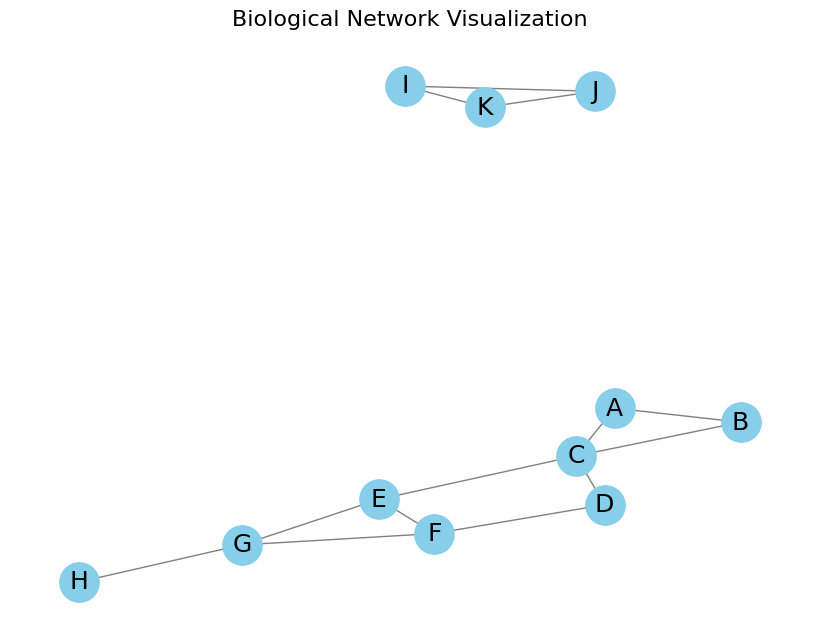

In [6]:
plt.figure(figsize=(8, 6))
nx.draw(
    G, 
    with_labels=True, 
    node_size=800,  # Customize node size
    font_size=18,   # Customize label size
    node_color="skyblue",  # Color of the nodes
    edge_color="gray"      # Color of the edges
)
plt.title("Biological Network Visualization", fontsize=16)
plt.show()

## Step 3: Key Graph Properties 

In [7]:
# Basic properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = dict(G.degree())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Node degrees: {degrees}")

Number of nodes: 11
Number of edges: 13
Node degrees: {'A': 2, 'B': 2, 'C': 4, 'D': 2, 'F': 3, 'E': 3, 'G': 3, 'H': 1, 'I': 2, 'J': 2, 'K': 2}


## Step 4: Node Centrality 

Degree Centrality: {'A': 0.2, 'B': 0.2, 'C': 0.4, 'D': 0.2, 'F': 0.30000000000000004, 'E': 0.30000000000000004, 'G': 0.30000000000000004, 'H': 0.1, 'I': 0.2, 'J': 0.2, 'K': 0.2}


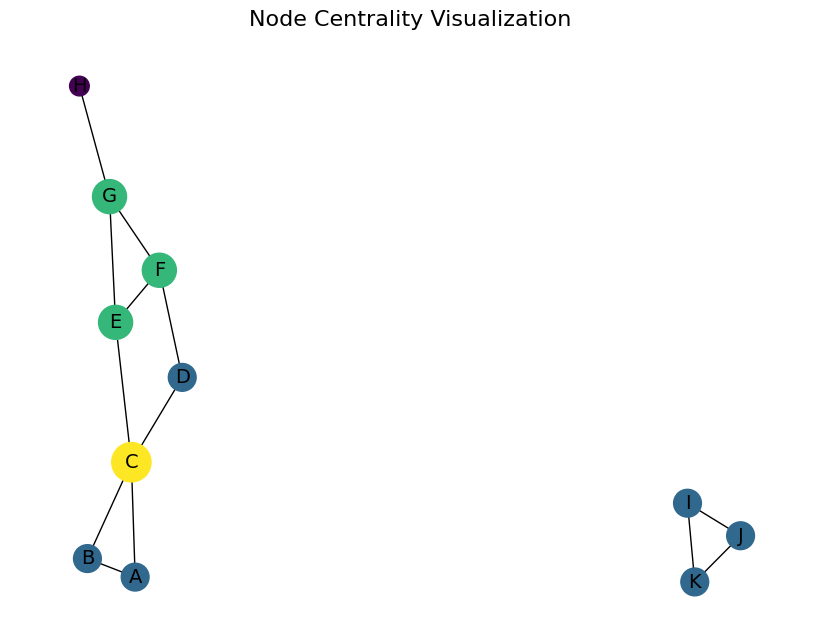

In [8]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Visualize centrality
plt.figure(figsize=(8, 6))
node_sizes = [v * 2000 for v in degree_centrality.values()]  # Scale sizes by centrality
nx.draw(
    G, 
    with_labels=True, 
    node_size=node_sizes, 
    font_size=14, 
    node_color=list(degree_centrality.values()),  # Color nodes by centrality
    cmap=plt.cm.viridis
)
plt.title("Node Centrality Visualization", fontsize=16)
plt.show()

## Step 5: Clustering Coefficient 

In [9]:
# Calculate clustering coefficients
clustering_coeff = nx.clustering(G)
print("Clustering Coefficients:", clustering_coeff)

# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")

Clustering Coefficients: {'A': 1.0, 'B': 1.0, 'C': 0.16666666666666666, 'D': 0, 'F': 0.3333333333333333, 'E': 0.3333333333333333, 'G': 0.3333333333333333, 'H': 0, 'I': 1.0, 'J': 1.0, 'K': 1.0}
Average Clustering Coefficient: 0.5606060606060607


## Step 6: Betweenness Centrality 

Betweenness Centrality of nodes: {'A': 0.0, 'B': 0.0, 'C': 0.23333333333333334, 'D': 0.03333333333333333, 'F': 0.05555555555555556, 'E': 0.16666666666666669, 'G': 0.13333333333333333, 'H': 0.0, 'I': 0.0, 'J': 0.0, 'K': 0.0}


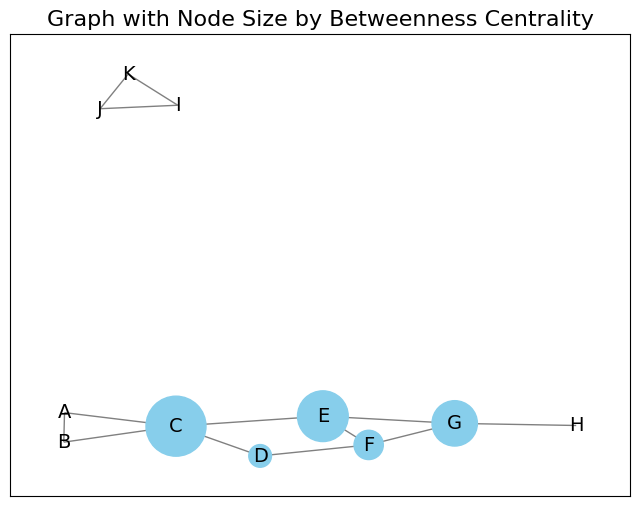

In [10]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("Betweenness Centrality of nodes:", betweenness)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

# Draw nodes with size proportional to betweenness centrality
nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=[8000 * betweenness[node] for node in G.nodes()], 
    node_color="skyblue"
)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=14)

plt.title("Graph with Node Size by Betweenness Centrality", fontsize=16)
plt.show()


## Step 6: Shortest Path Analysis


In [11]:
# Calculate shortest path lengths from a node
shortest_paths = nx.shortest_path_length(G, source='A')  # Example from node 'A'
print(f"Shortest paths from node 'A': {dict(shortest_paths)}")

# Diameter (longest shortest path in the graph)
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"Graph Diameter: {diameter}")
else:
    print("Graph is not connected. Diameter is undefined.")


Shortest paths from node 'A': {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3, 'G': 3, 'H': 4}
Graph is not connected. Diameter is undefined.


## Step 7: Connected Components

In [12]:
# Find connected components
components = list(nx.connected_components(G))
print(f"Connected Components: {components}")

# Number of connected components
num_components = nx.number_connected_components(G)
print(f"Number of Connected Components: {num_components}")


Connected Components: [{'D', 'C', 'E', 'B', 'F', 'H', 'G', 'A'}, {'I', 'K', 'J'}]
Number of Connected Components: 2


## Step 8: Advanced Visualization 

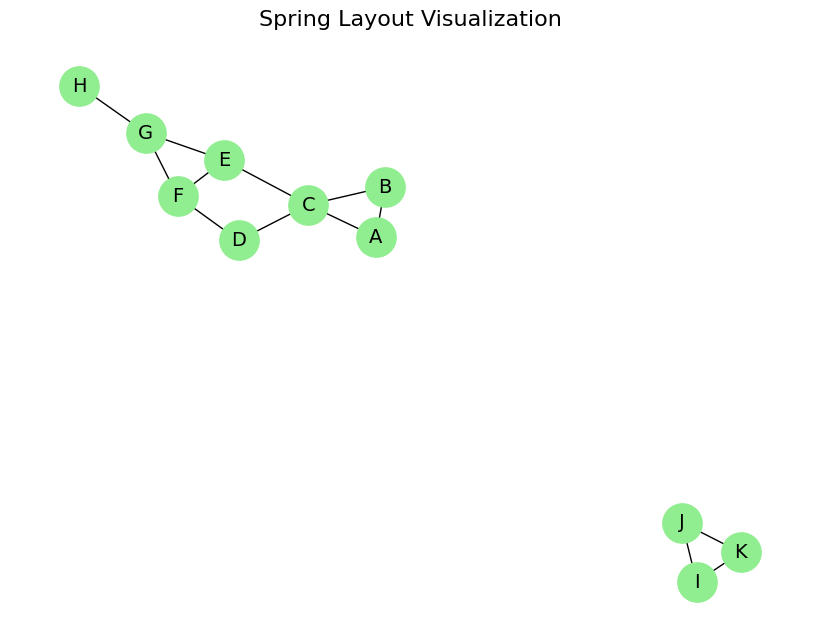

In [13]:

# Spring layout visualization
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Node layout algorithm
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=800, 
    font_size=14, 
    node_color="lightgreen", 
    edge_color="black"
)
plt.title("Spring Layout Visualization", fontsize=16)
plt.show()

## Step 9: Save and Share the Graph 

In [14]:

# Save the graph to a file
nx.write_graphml(G, "biological_network.graphml")  # Save as GraphML



## Step 10: Identify motifs 

In [15]:
# Import a specialized library for motif analysis
from networkx.algorithms.approximation import k_components

# Example: Count triangles (3-node motifs)
triangles = nx.triangles(G)
print(f"Triangles in the graph (node-wise): {triangles}")

# Total number of triangles
total_triangles = sum(triangles.values()) // 3
print(f"Total number of triangles: {total_triangles}")

Triangles in the graph (node-wise): {'A': 1, 'B': 1, 'C': 1, 'D': 0, 'F': 1, 'E': 1, 'G': 1, 'H': 0, 'I': 1, 'J': 1, 'K': 1}
Total number of triangles: 3


## Step 11: Visualize Motifs 

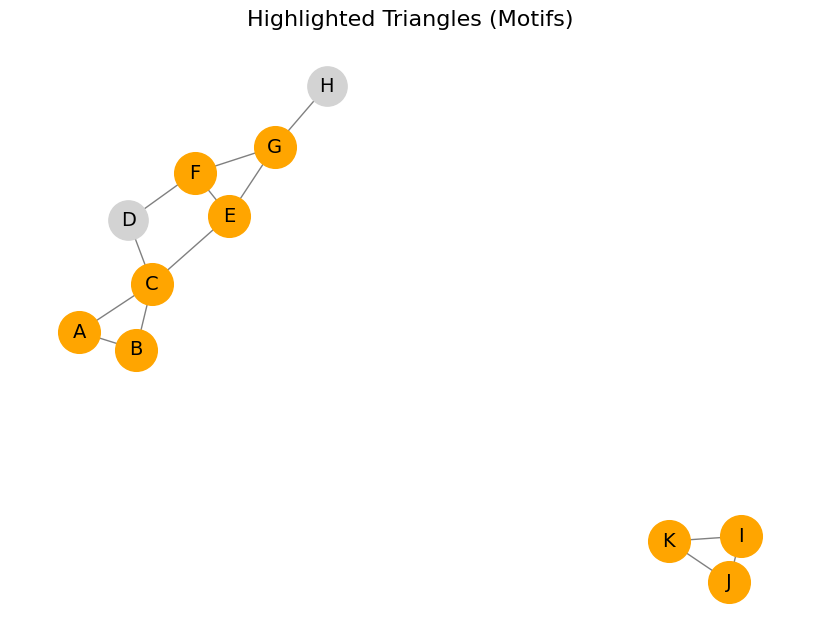

In [16]:
# Highlight triangles
triangle_nodes = [node for node, count in triangles.items() if count > 0]
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

# Draw the entire graph
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=800, 
    font_size=14, 
    node_color="lightgray", 
    edge_color="gray"
)

# Highlight motif nodes
nx.draw_networkx_nodes(
    G, 
    pos, 
    nodelist=triangle_nodes, 
    node_size=900, 
    node_color="orange"
)
plt.title("Highlighted Triangles (Motifs)", fontsize=16)
plt.show()


## Step 12: Count Specific k-node Motifs 

In [17]:
# Find connected components of size k
k_comp = k_components(G)
print(f"k-components in the graph: {k_comp}")


k-components in the graph: defaultdict(<class 'list'>, {1: [{'D', 'C', 'E', 'B', 'F', 'H', 'G', 'A'}, {'I', 'K', 'J'}], 2: [{'D', 'F', 'C', 'G', 'E'}, {'B', 'C', 'A'}, {'I', 'K', 'J'}]})


## Step 13: Construct a gene co-expression weighted graph 

In [18]:
# Example: Weighted gene co-expression network
weighted_edges = [
    ('Gene1', 'Gene2', 0.85), 
    ('Gene2', 'Gene3', 0.75), 
    ('Gene3', 'Gene4', 0.65), 
    ('Gene4', 'Gene5', 0.90),
    ('Gene1', 'Gene5', 0.80)
]

# Create a weighted graph
W = nx.Graph()
W.add_weighted_edges_from(weighted_edges)

# View edges with weights
print("Weighted edges:", W.edges(data=True))


Weighted edges: [('Gene1', 'Gene2', {'weight': 0.85}), ('Gene1', 'Gene5', {'weight': 0.8}), ('Gene2', 'Gene3', {'weight': 0.75}), ('Gene3', 'Gene4', {'weight': 0.65}), ('Gene4', 'Gene5', {'weight': 0.9})]


## Step 14: Analyze Edge weight 

In [19]:
# Get edge weights
weights = nx.get_edge_attributes(W, 'weight')
print(f"Edge Weights: {weights}")

# Calculate strength (weighted degree) of nodes
#strength = {node: sum(weight for _, weight in W[node].items()) for node in W.nodes}
#print(f"Node strengths (weighted degree): {strength}")


Edge Weights: {('Gene1', 'Gene2'): 0.85, ('Gene1', 'Gene5'): 0.8, ('Gene2', 'Gene3'): 0.75, ('Gene3', 'Gene4'): 0.65, ('Gene4', 'Gene5'): 0.9}


## Step 15:  Visualize Weighted Networks

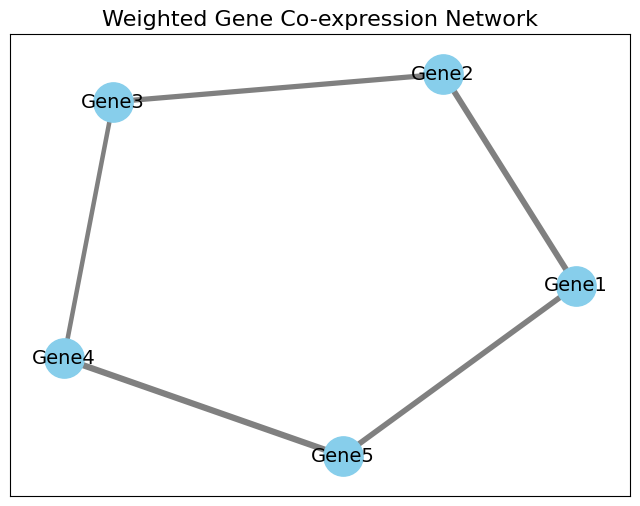

In [20]:
# Visualize the weighted network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(W)

# Draw nodes
nx.draw_networkx_nodes(W, pos, node_size=800, node_color="skyblue")

# Draw edges with width proportional to weights
nx.draw_networkx_edges(
    W, 
    pos, 
    width=[W[u][v]['weight'] * 5 for u, v in W.edges()], 
    edge_color="gray"
)

# Add labels
nx.draw_networkx_labels(W, pos, font_size=14)

plt.title("Weighted Gene Co-expression Network", fontsize=16)
plt.show()


## Step 16: Correlation Thresholding

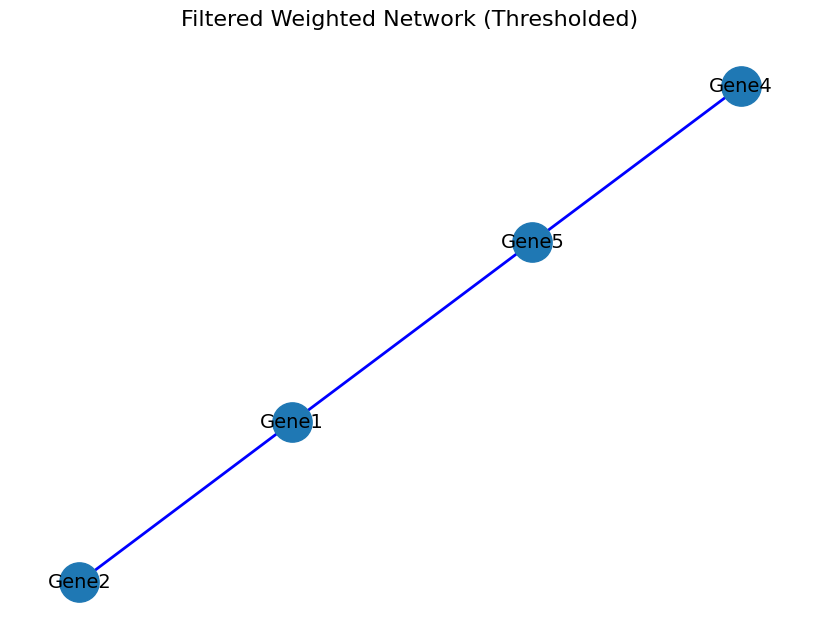

In [21]:
# Threshold to filter weak edges
threshold = 0.8
filtered_edges = [(u, v, w) for u, v, w in W.edges(data='weight') if w >= threshold]

# Create a new graph with filtered edges
filtered_graph = nx.Graph()
filtered_graph.add_weighted_edges_from(filtered_edges)

# Visualize the filtered network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(filtered_graph)
nx.draw(
    filtered_graph, 
    pos, 
    with_labels=True, 
    node_size=800, 
    font_size=14, 
    edge_color="blue",
    width=2
)
plt.title("Filtered Weighted Network (Thresholded)", fontsize=16)
plt.show()
